# Example usage of `BO_Iterator` class

In [4]:
from BO_Iterator import BayesianOptimizerIterator, SyntheticGaussian

param_names = ["a", "b"]
param_bounds = [[-1.0, 1.0], [-1.0, 1.0]]
objective_function = SyntheticGaussian(centers=[0.2, 0.1], sigma=0.1, n_samples=1)
suggested_params = []
observed_objective = []
best_result = {"params": None, "value": float("-inf")}
run_async = True
num_initial_samples = 20
trial_budget = 20
batch_size = 2
explore_ratio = 0.1
threshold = 0.999
epsilon = 0.001
patience = 20
maximize = True

# Initialize the Bayesian Optimizer Iterator
bo_iterator = BayesianOptimizerIterator(
    objective_function=objective_function,  # The objective function to optimize
    param_names=param_names,  # Names of the parameters
    param_bounds=param_bounds,  # Bounds for the parameters
    num_initial_samples=num_initial_samples,  # Number of initial samples
    trial_budget=trial_budget,  # Total number of trials
    batch_size=batch_size,  # Number of trials per batch
    explore_ratio=explore_ratio,  # Exploration ratio
    threshold=threshold,  # Threshold for early stopping
    epsilon=epsilon,  # Convergence tolerance
    patience=patience,  # Number of iterations to wait for improvement
    run_async=run_async,  # Whether to run asynchronously
    maximize=maximize,  # Whether to maximize the objective function
)

# Run the optimization loop
async for output in bo_iterator:
    if "final_model" in output:
        output = output["final_model"]
    else:
        params = output
        z_mean, z_sem = objective_function.read([params[name] for name in param_names])
        suggested_params.append(params)
        observed_objective.append(z_mean)
        if z_mean > best_result["value"]:
            best_result = {"params": params, "value": z_mean}

# Store the results
results = {
    "suggested_params": suggested_params,
    "observed_objective": observed_objective,
    "best_result": best_result,
}

[INFO 12-23 00:39:26] ax.service.ax_client: Starting optimization with verbose logging. To disable logging, set the `verbose_logging` argument to `False`. Note that float values in the logs are rounded to 6 decimal points.
[INFO 12-23 00:39:26] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter a. If that is not the expected value type, you can explicity specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 12-23 00:39:26] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter b. If that is not the expected value type, you can explicity specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 12-23 00:39:26] ax.service.utils.instantiation: Created search space: SearchSpace(parameters=[RangeParameter(name='a', parameter_type=FLOAT, range=[-1.0, 1.0]), RangeParameter(name='b', parameter_type=FLOAT, range=[-1.0, 1.0])], parameter_constraints=[]).
[INFO 12-23 00:39:26] a

$ Using GPEI (Exploitation)
$ Using GPEI (Exploitation)
$ Using GPEI (Exploitation)
~ Using qNIPV (Exploration)


[INFO 12-23 00:39:26] ax.service.ax_client: Completed trial 8 with data: {'objective': (0.0, 0.0)}.
[INFO 12-23 00:39:26] ax.service.ax_client: Generated new trial 10 with parameters {'a': 0.356514, 'b': -0.800045}.
[INFO 12-23 00:39:26] ax.service.ax_client: Generated new trial 11 with parameters {'a': 0.87489, 'b': 0.373777}.
[INFO 12-23 00:39:26] ax.service.ax_client: Completed trial 10 with data: {'objective': (0.0, 0.0)}.
[INFO 12-23 00:39:26] ax.service.ax_client: Completed trial 11 with data: {'objective': (0.0, 0.0)}.
[INFO 12-23 00:39:26] ax.service.ax_client: Generated new trial 12 with parameters {'a': 0.082233, 'b': -0.084491}.
[INFO 12-23 00:39:26] ax.service.ax_client: Generated new trial 13 with parameters {'a': 0.082233, 'b': -0.084491}.
[INFO 12-23 00:39:26] ax.service.ax_client: Completed trial 12 with data: {'objective': (0.091146, 0.0)}.
[INFO 12-23 00:39:26] ax.service.ax_client: Completed trial 13 with data: {'objective': (0.091146, 0.0)}.
[INFO 12-23 00:39:26] ax

$ Using GPEI (Exploitation)
$ Using GPEI (Exploitation)
$ Using GPEI (Exploitation)
$ Using GPEI (Exploitation)


[INFO 12-23 00:39:26] ax.service.ax_client: Completed trial 16 with data: {'objective': (0.0, 0.0)}.
[INFO 12-23 00:39:26] ax.service.ax_client: Generated new trial 18 with parameters {'a': 0.536541, 'b': 0.088942}.
[INFO 12-23 00:39:26] ax.service.ax_client: Generated new trial 19 with parameters {'a': 0.505436, 'b': -0.038308}.
[INFO 12-23 00:39:26] ax.service.ax_client: Completed trial 19 with data: {'objective': (0.003621, 0.0)}.
[INFO 12-23 00:39:26] ax.service.ax_client: Completed trial 18 with data: {'objective': (0.003451, 0.0)}.


$ Using GPEI (Exploitation)
$ Using GPEI (Exploitation)


[INFO 12-23 00:39:28] ax.service.ax_client: Generated new trial 20 with parameters {'a': 0.039854, 'b': 0.03725}.
[INFO 12-23 00:39:28] ax.service.ax_client: Generated new trial 21 with parameters {'a': 0.039813, 'b': 0.037336}.
[INFO 12-23 00:39:28] ax.service.ax_client: Completed trial 21 with data: {'objective': (0.22779, 0.0)}.
[INFO 12-23 00:39:28] ax.service.ax_client: Completed trial 20 with data: {'objective': (0.227818, 0.0)}.
[INFO 12-23 00:39:28] ax.modelbridge.torch: The observations are identical to the last set of observations used to fit the model. Skipping model fitting.


$ Using GPEI (Exploitation)


[INFO 12-23 00:39:30] ax.service.ax_client: Generated new trial 22 with parameters {'a': 0.039858, 'b': 0.037241}.
[INFO 12-23 00:39:31] ax.service.ax_client: Generated new trial 23 with parameters {'a': -0.040749, 'b': 0.061778}.
[INFO 12-23 00:39:31] ax.service.ax_client: Completed trial 22 with data: {'objective': (0.22782, 0.0)}.
[INFO 12-23 00:39:31] ax.service.ax_client: Completed trial 23 with data: {'objective': (0.05125, 0.0)}.
[INFO 12-23 00:39:31] ax.modelbridge.torch: The observations are identical to the last set of observations used to fit the model. Skipping model fitting.


$ Using GPEI (Exploitation)


[INFO 12-23 00:39:32] ax.service.ax_client: Generated new trial 24 with parameters {'a': 0.052985, 'b': 0.076059}.
[INFO 12-23 00:39:33] ax.service.ax_client: Generated new trial 25 with parameters {'a': 0.037008, 'b': 0.21474}.
[INFO 12-23 00:39:33] ax.service.ax_client: Completed trial 24 with data: {'objective': (0.329781, 0.0)}.
[INFO 12-23 00:39:33] ax.service.ax_client: Completed trial 25 with data: {'objective': (0.137164, 0.0)}.
[INFO 12-23 00:39:33] ax.modelbridge.torch: The observations are identical to the last set of observations used to fit the model. Skipping model fitting.


$ Using GPEI (Exploitation)


[INFO 12-23 00:39:34] ax.service.ax_client: Generated new trial 26 with parameters {'a': 0.065287, 'b': 0.091912}.
[INFO 12-23 00:39:35] ax.service.ax_client: Generated new trial 27 with parameters {'a': 0.037039, 'b': 0.213037}.
[INFO 12-23 00:39:35] ax.service.ax_client: Completed trial 27 with data: {'objective': (0.13992, 0.0)}.
[INFO 12-23 00:39:35] ax.service.ax_client: Completed trial 26 with data: {'objective': (0.402264, 0.0)}.
[INFO 12-23 00:39:35] ax.modelbridge.torch: The observations are identical to the last set of observations used to fit the model. Skipping model fitting.


$ Using GPEI (Exploitation)


[INFO 12-23 00:39:36] ax.service.ax_client: Generated new trial 28 with parameters {'a': 0.078127, 'b': 0.10501}.
[INFO 12-23 00:39:36] ax.service.ax_client: Generated new trial 29 with parameters {'a': 0.065269, 'b': 0.091902}.
[INFO 12-23 00:39:36] ax.service.ax_client: Completed trial 29 with data: {'objective': (0.402159, 0.0)}.
[INFO 12-23 00:39:36] ax.service.ax_client: Completed trial 28 with data: {'objective': (0.475251, 0.0)}.
[INFO 12-23 00:39:36] ax.modelbridge.torch: The observations are identical to the last set of observations used to fit the model. Skipping model fitting.


~ Using qNIPV (Exploration)


[INFO 12-23 00:39:37] ax.service.ax_client: Generated new trial 30 with parameters {'a': 0.084266, 'b': 0.088271}.
[INFO 12-23 00:39:38] ax.service.ax_client: Generated new trial 31 with parameters {'a': 0.099985, 'b': 0.117307}.
[INFO 12-23 00:39:38] ax.service.ax_client: Completed trial 30 with data: {'objective': (0.508343, 0.0)}.
[INFO 12-23 00:39:38] ax.service.ax_client: Completed trial 31 with data: {'objective': (0.597423, 0.0)}.
[INFO 12-23 00:39:38] ax.modelbridge.torch: The observations are identical to the last set of observations used to fit the model. Skipping model fitting.


$ Using GPEI (Exploitation)


[INFO 12-23 00:39:40] ax.service.ax_client: Generated new trial 32 with parameters {'a': 0.099978, 'b': 0.117305}.
[INFO 12-23 00:39:41] ax.service.ax_client: Generated new trial 33 with parameters {'a': 0.138108, 'b': 0.115183}.
[INFO 12-23 00:39:41] ax.service.ax_client: Completed trial 32 with data: {'objective': (0.597385, 0.0)}.
[INFO 12-23 00:39:41] ax.service.ax_client: Completed trial 33 with data: {'objective': (0.81623, 0.0)}.
[INFO 12-23 00:39:41] ax.modelbridge.torch: The observations are identical to the last set of observations used to fit the model. Skipping model fitting.


~ Using qNIPV (Exploration)


[INFO 12-23 00:39:42] ax.service.ax_client: Generated new trial 34 with parameters {'a': 0.195493, 'b': 0.113573}.
[INFO 12-23 00:39:42] ax.service.ax_client: Generated new trial 35 with parameters {'a': 0.15895, 'b': 0.120687}.
[INFO 12-23 00:39:42] ax.service.ax_client: Completed trial 35 with data: {'objective': (0.899738, 0.0)}.
[INFO 12-23 00:39:42] ax.service.ax_client: Completed trial 34 with data: {'objective': (0.989825, 0.0)}.
[INFO 12-23 00:39:43] ax.modelbridge.torch: The observations are identical to the last set of observations used to fit the model. Skipping model fitting.


$ Using GPEI (Exploitation)


[INFO 12-23 00:39:45] ax.service.ax_client: Generated new trial 36 with parameters {'a': 0.195481, 'b': 0.113572}.
[INFO 12-23 00:39:45] ax.service.ax_client: Generated new trial 37 with parameters {'a': 0.214061, 'b': 0.096055}.
[INFO 12-23 00:39:45] ax.service.ax_client: Completed trial 36 with data: {'objective': (0.989822, 0.0)}.
[INFO 12-23 00:39:45] ax.service.ax_client: Completed trial 37 with data: {'objective': (0.989393, 0.0)}.
[INFO 12-23 00:39:45] ax.modelbridge.torch: The observations are identical to the last set of observations used to fit the model. Skipping model fitting.


$ Using GPEI (Exploitation)


[INFO 12-23 00:39:47] ax.service.ax_client: Generated new trial 38 with parameters {'a': 0.214006, 'b': 0.096236}.
[INFO 12-23 00:39:47] ax.service.ax_client: Generated new trial 39 with parameters {'a': 0.21977, 'b': 0.126548}.
[INFO 12-23 00:39:47] ax.service.ax_client: Completed trial 38 with data: {'objective': (0.989539, 0.0)}.
[INFO 12-23 00:39:47] ax.service.ax_client: Completed trial 39 with data: {'objective': (0.946691, 0.0)}.
[INFO 12-23 00:39:47] ax.modelbridge.torch: The observations are identical to the last set of observations used to fit the model. Skipping model fitting.


$ Using GPEI (Exploitation)


[INFO 12-23 00:39:48] ax.service.ax_client: Generated new trial 40 with parameters {'a': 0.19827, 'b': 0.092516}.
[INFO 12-23 00:39:48] ax.service.ax_client: Generated new trial 41 with parameters {'a': 0.246331, 'b': 0.160342}.
[INFO 12-23 00:39:48] ax.service.ax_client: Completed trial 41 with data: {'objective': (0.748724, 0.0)}.
[INFO 12-23 00:39:48] ax.service.ax_client: Completed trial 40 with data: {'objective': (0.997054, 0.0)}.


Trial budget met


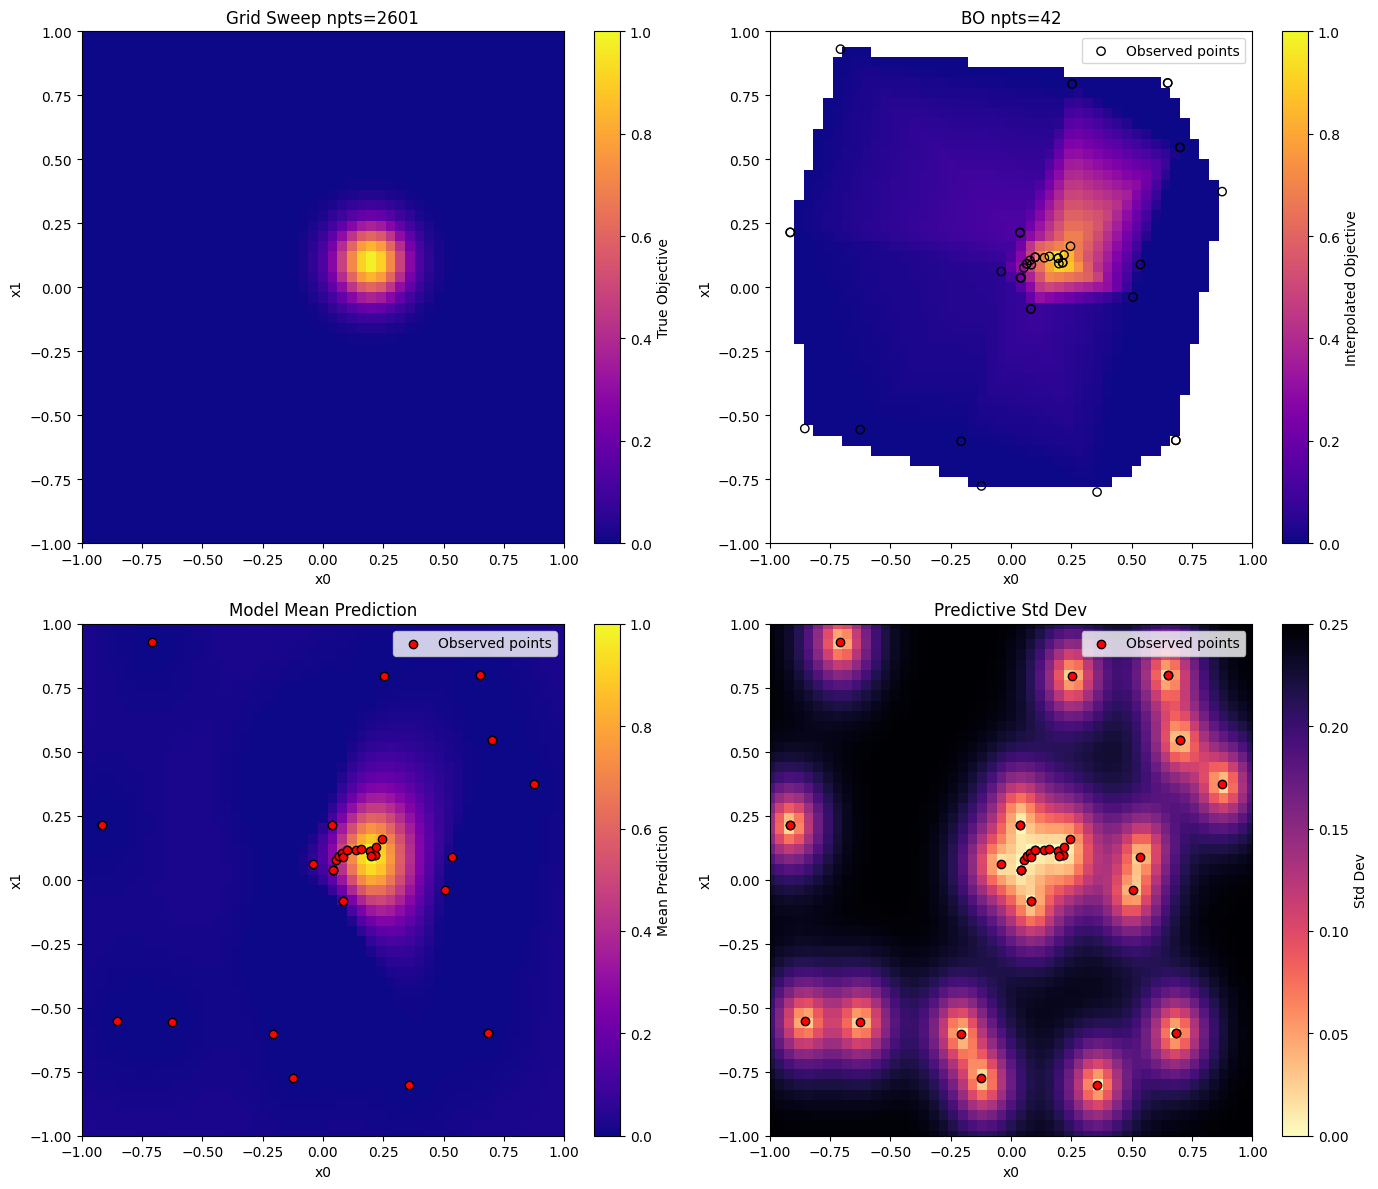

In [10]:
import numpy as np
from ax.core.observation import ObservationFeatures
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

# --- Extract observed x0, x1, and objective values ---
x0_vals = [p[param_names[0]] for p in results["suggested_params"]]
x1_vals = [p[param_names[1]] for p in results["suggested_params"]]

# --- Grid Sweep: True Objective Function ---
x0 = np.linspace(-1, 1, 51)
x1 = np.linspace(-1, 1, 51)
x0_grid, x1_grid = np.meshgrid(x0, x1)
objective_grid = np.exp(-((x0_grid - 0.2) ** 2 + (x1_grid - 0.1) ** 2) / (2 * 0.1**2))

# --- Interpolated Surface ---
x0_interp_grid, x1_interp_grid = np.meshgrid(x0, x1)
objective_interp = griddata((x0_vals, x1_vals), observed_objective, (x0_interp_grid, x1_interp_grid), method="linear")

# --- Model Predictions (Mean and Std Dev) ---
# Prepare grid for evaluation
mesh = np.column_stack([x0_grid.ravel(), x1_grid.ravel()])

# Convert grid points to Ax-compatible observation features
observation_features = [
    ObservationFeatures(parameters={param_names[0]: float(x0_val), param_names[1]: float(x1_val)})
    for x0_val, x1_val in mesh
]

# Predict using the model
mean_dict, cov_dict = output.predict(observation_features)

# Extract mean and covariance
mean_objective = np.array(mean_dict["objective"])
cov_objective = np.array(cov_dict["objective"]["objective"])

# Compute variance and standard deviation
var = cov_objective if cov_objective.ndim == 1 else np.diag(cov_objective)
std = np.sqrt(var)

# Reshape predictions to grid
f_mean_grid = mean_objective.reshape(x0_grid.shape)
f_std_grid = std.reshape(x0_grid.shape)

# --- Plot Results in a 2x2 Grid ---
fig, ax = plt.subplots(2, 2, figsize=(14, 12))

# Titles and labels
titles = ["Grid Sweep npts=2601", f"BO npts={len(x0_vals)}", "Model Mean Prediction", "Predictive Std Dev"]
labels = ["True Objective", "Interpolated Objective", "Mean Prediction", "Std Dev"]
data = [objective_grid, objective_interp, f_mean_grid, f_std_grid]
cmaps = ["plasma", "plasma", "plasma", "magma_r"]
vmins = [0, 0, 0, 0]
vmaxs = [1, 1, 1, 0.25]
scatter_colors = ["none", "none", "red", "red"]

for i, ax in enumerate(ax.flat):
    c = ax.pcolormesh(x0_grid, x1_grid, data[i], shading="auto", cmap=cmaps[i], vmin=vmins[i], vmax=vmaxs[i])
    if i > 0:
        ax.scatter(x0_vals, x1_vals, edgecolor="black", facecolor=scatter_colors[i], label="Observed points")
        ax.legend(loc="upper right")
    ax.set_title(titles[i])
    ax.set_xlabel("x0")
    ax.set_ylabel("x1")
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)
    fig.colorbar(c, ax=ax, label=labels[i])

# Adjust layout and show
plt.tight_layout()
plt.show()
